<a href="https://colab.research.google.com/github/kipsangmarion/jkuat-student-admission-simulation/blob/main/JKUAT_Student_Admission_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JKUAT STUDENT ADMISSION SIMULATION**

## TABLE OF CONTENTS
>[1.Problem Formulation](#scrollTo=N7sUVixLoiiP)

>[2.Objectives and Overall Project Plan](#scrollTo=0ufezMC2pI01)

>>[2.1 Objectives/ Questions to be answered by system](#scrollTo=WCN07Bqdpe2Z)

>>[2.2 Project Plan](#scrollTo=4X7rmb5Vp66Y)

>>>[2.2.1 Alternativen systems and methods of evaluating them](#scrollTo=4X7rmb5Vp66Y)

>>>[2.2.2 Project team:](#scrollTo=4X7rmb5Vp66Y)

>[3.Model Conceptualization](#scrollTo=xPvbRasXaBLf)

>[4.Data Collection](#scrollTo=uK86yewVh73s)

>[5.Model Translation](#scrollTo=19UA4UoMjJS6)

>>[5.1 Adding dependecies](#scrollTo=dKA2AJ6fjXPk)

>>[5.2 Generating student service times](#scrollTo=P8ZzhAC2j41m)

>>[5.3 Generating student arrival times](#scrollTo=wY5YrjjGkbA4)

>>[5.4 Calculating inter-arrival times](#scrollTo=_g0hZG9kkuZy)

>>[5.5 Calculations for the following data:](#scrollTo=QZwW4PEHlApi)

>>[5.6 Adding all the data to a dataframe](#scrollTo=SM6pWG-PmSPi)

>>[5.7 Calculating the results](#scrollTo=aKyiI6wdmrGp)

>[6.Model Verification](#scrollTo=OtE2BkKQm05M)

>[7.Model Validation](#scrollTo=IiKzq-_Sm68o)

>[8.Experimental design](#scrollTo=NHCkJRPcnCK0)

>>[8.1 Setting up parameters for the simulation](#scrollTo=38F6N50atD4j)

>>[8.2 Functions to monitor the student and their arrival](#scrollTo=j-h9EzICu0eF)

>>[8.4 Defining the optimal conditions that the simulation should determine](#scrollTo=U1BAmdiQxCHK)

>>[8.5 Finding Optimal Conditions](#scrollTo=cQcTNgSXyIY0)

>>[8.6 The results](#scrollTo=wA8SDo5ayosK)

>[9.More runs](#scrollTo=3SYdz765UD8W)

>[10.Implementation](#scrollTo=OsuCcYC2zTCz)

>[11.References](#scrollTo=iPpIkK0w6SAJ)



#1.Problem Formulation

The student admission process in Jomo Kenyatta University of Agriculture and Technology is slow and cumbersome. The students spend a long time in the queue due to slow service. The servers are few in number when compared to the number of students. Our aim for the simulation is to determine an optimum set of conditions that will allow the admission process to run smoothly, efficiently and faster. In this project, we will focus the simulation on a single college, College of Pure and Applied Sciences.

# 2.Objectives and Overall Project Plan

## 2.1 Objectives/ Questions to be answered by system

* What is the average waiting time for students in the queue?
* What is the average amount of time the server is idle?
* What is the average service time for a student?
* What is the average inter-arrival time?
* What is the average amount of time a student spends in the system?
* How can we optimize the queueing system to attend to students more efficiently?

## 2.2 Project Plan

### 2.2.1 Alternativen systems and methods of evaluating them
1. Online addmission which can be evaluated on the basis of the efficiency of network servers and availability of reliable internet connection for students.

### 2.2.2 Project team:

Shirley Mbeyu Ddaiddo

Ashley Mbeke Muoki

Ceasar Njuguna Ngunu

Marion Cherotich Kipsang

Allan Erissat Okedo





#3.Model Conceptualization

We consider a system for admitting students to Jomo Kenyatta University of agriculture and Technology, College of Pure and Applied Sciences. We then consider a situation with two servers attending to a single queue of students, and the number of students to be served is 1,000 students.

We collect data on student arrival times and service times. We the consider a 40 hours (5 8-hour days) period of time. From that data, and for each student, we determine:
* the inter-arrival times:
    - This is the difference between the arrival times of the current students in the queue and the student who arrived right before them in the queue.
    - The inter-arrival time for the first student in the queue is zero.

    `inter_arrival_time = arrival_time[current] - arrival_time[previous]`

* time service begins:
    - Time service begins is dependent on the arrival time of the current student as compared to the time service ends for the previous student.
    - If a student arrives before the previous student has been finished being served, their service begins when the previous student finishes being served.
    - If a student arrives when the previous student has already been served, their service begins as soon as they arrive.

    ```
    If arrival_time[current] < service_end_time[previous]:

    begin_service_time [current] = service_end_time[previous]

    else

    begin_service_time [current] = arrival_time[current]

    ```
* time service ends:
    - Time that service ends for a student is equal to the sum of the time service begins and the time taken to serve them.
    
    `service_end_time[current] = begin_service_time[current] + service_time[current]`


* the queue wait times:
    - Time that a student spends queueing depends on their arrival time as compared to the time service ends for the previous student.
    - If a student arrives before the previous student has been finished being served, their time in the queue is the difference between the time service ends for the previous student and the current students arrival time.
    - If a student arrives when the previous student has already been served, they do not spend any time queueing.

    ```
    If arrival_time[current] < service_end_time[previous]:

    queue_wait_time[current] =  service_end_time[previous]- arrival_time[current]

    else
    queue_wait_time[current] = 0

    ```

* time in the system:
    - The time a student spends in the system is the sum of the time they spent queueing and the time spend being served.

    `time_in_system = service_end_time - arrival_time`

* server idle times:
    - Server idle times depends on the current students arrival time as compared to the time service ends for the previous student
    - If a student arrives before another student has been finished being served, the server has no idle time since there is a student in the queue.
    - If a student arrives when there is no one being served, the server is idle until the another student arrives.

    ```
    If arrival_time[current] < service_end_time[previous]:

    server_idle_time = 0

    else

    server_idle_time = arrival_time[current]- end_service_time[previous]

    ```
From the calculated data, we can determine the averages required, the effectiveness of the system, and how we can optimize the system.

# 4.Data Collection

Data for the system is computer generated using pseudo-random numbers.

* Arrival Time:

Arrival time for students in minutes is generated using a function that generated pseudo-random numbers that increase. The fuction generates 1,000 arrival times that span 40 hours/ 2400 minutes.

* Service Time:

Service time for students in minutes is generated using a sin function that outputs pseudo-random values that are then multiplied by 10.

# 5.Model Translation

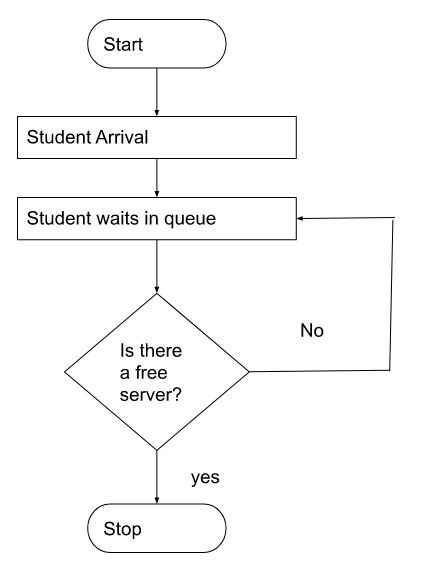

The above model is translated into python code.

## 5.1 Adding dependecies
The system requires:
* simpy for access to an environment that allows us to run simulations
* pandas, and numpy to compute calculations on data frames and arrays
* random for the generation of pseudo-random numbers
* math for access to the sine function

In [ ]:
!pip install simpy
import simpy
import pandas as pd
import numpy as np
import random
import math
from math import sin

Initializing the number of servers

In [ ]:
n_servers = 2

## 5.2 Generating student service times

In [ ]:
service_times= []

for i in range(1000):
  num = random.random()
  time = round((10*(sin(num)+1)/2), 2)
  service_times.append(time)

len(service_times)

1000

## 5.3 Generating student arrival times

In [ ]:
arrival_times = []

arrival_time = 10*random.random()
arrival_times.append(round(arrival_time, 2))

for i in range(999):
    arrival_time = 10*random.random() * ((2400-arrival_times[i])/2400) + arrival_times[i]
    arrival_times.append(round(arrival_time, 2))

for i in range(999):
     arrival_times[i]

len(arrival_times)

1000

## 5.4 Calculating inter-arrival times

In [ ]:
inter_arrival_times = [0]
for i in range(1, 1000):
    inter_arrival_time = round(arrival_times[i] - arrival_times[i - 1], 2)
    inter_arrival_times.append(inter_arrival_time)

len(inter_arrival_times)

1000

## 5.5 Calculations for the following data:

* When service begins
* Time spent queueing
* When service ends
* Time spent in the system
* Server idle time

In [ ]:
service_begin_times = [[arrival_times[0]] for _ in range(n_servers)]
queue_wait_times = [[0.00] for _ in range(n_servers)]
service_end_times = [[service_begin_times[0][0] + service_times[0]] for _ in range(n_servers)]
times_in_system = [[service_times[0]] for _ in range(n_servers)]
server_idle_times = [[0] for _ in range(n_servers)]

for i in range(1, 1000):
    # Find the server that ends service earliest
    server_id = np.argmin([service_end_times[j][-1] for j in range(n_servers)])

    if arrival_times[i] > service_end_times[server_id][-1]:
        service_begin_time = arrival_times[i]
        queue_wait_time = 0.00
        server_idle_time = arrival_times[i] - service_end_times[server_id][-1]
    else:
        service_begin_time = service_end_times[server_id][-1]
        queue_wait_time = service_end_times[server_id][-1] - arrival_times[i]
        server_idle_time = 0.00

    service_end_time = round(service_times[i] + service_begin_time, 2)
    time_in_system = round(queue_wait_time + service_times[i], 2)

    service_begin_times[server_id].append(service_begin_time)
    queue_wait_times[server_id].append(queue_wait_time)
    service_end_times[server_id].append(service_end_time)
    times_in_system[server_id].append(time_in_system)
    server_idle_times[server_id].append(server_idle_time)

## 5.6 Adding all the data to a dataframe

In [ ]:
# Creating a separate DataFrame for each server
for i in range(n_servers):
    ss = pd.DataFrame(
        {'service_time': service_times[:len(service_begin_times[i])],
         'arrival_time': arrival_times[:len(service_begin_times[i])],
         'inter_arrival_time': inter_arrival_times[:len(service_begin_times[i])],
         'time_service_begins': service_begin_times[i],
         'queue_wait_time': queue_wait_times[i],
         'time_service_ends': service_end_times[i],
         'time_in_system': times_in_system[i],
         'server_idle_time': server_idle_times[i]
        })
    ss.to_csv(f'admission_data_server_{i}.csv')

## 5.7 Calculating the results

In [ ]:
average_waiting_time = ss['queue_wait_time'].mean()
average_idle_server_time = ss['server_idle_time'].mean()
average_service_time = ss['service_time'].mean()
average_inter_arrival_time = ss['inter_arrival_time'].mean()
average_time_in_system = ss['time_in_system'].mean()


In [ ]:
print(f"The average waiting time is: {round(average_waiting_time,2)}")
print(f"The average idle server time is: {average_idle_server_time}")
print(f"The average service time is: {round(average_service_time, 2)}")
print(f"The average inter arrival time is:{round(average_inter_arrival_time, 2)}")
print(f"The average time a student spent in the system: {round(average_time_in_system, 2)}")

The average waiting time is: 538.17
The average idle server time is: 0.19482897384305836
The average service time is: 7.33
The average inter arrival time is:3.08
The average time a student spent in the system: 545.58


# 6.Model Verification

These checks will give us some insights into whether the simulation results align with our expectations. If the simulation is correct, the average service time, queue wait time, and time in the system should be reasonably close to the specified values (10 * (sin(num) + 1) / 2) in the code.

The `inter_arrival_times` will not have any effect in this verification, as it is calculated from the generated `arrival_times`, and the `server_idle_times` will be zero for both servers as they are initialized to zero and not updated in the provided code.

In [ ]:
# Read the CSV files for both servers
server_0_data = pd.read_csv('admission_data_server_0.csv')
server_1_data = pd.read_csv('admission_data_server_1.csv')

# Check the number of rows in each DataFrame
print("Number of rows in Server 0 data:", len(server_0_data))
print("Number of rows in Server 1 data:", len(server_1_data))

# Calculate the average service time for both servers
avg_service_time_server_0 = server_0_data['service_time'].mean()
avg_service_time_server_1 = server_1_data['service_time'].mean()
print("Average service time for Server 0:", avg_service_time_server_0)
print("Average service time for Server 1:", avg_service_time_server_1)

# Calculate the average queue wait time for both servers
avg_queue_wait_time_server_0 = server_0_data['queue_wait_time'].mean()
avg_queue_wait_time_server_1 = server_1_data['queue_wait_time'].mean()
print("Average queue wait time for Server 0:", avg_queue_wait_time_server_0)
print("Average queue wait time for Server 1:", avg_queue_wait_time_server_1)

# Calculate the average time in the system for both servers
avg_time_in_system_server_0 = server_0_data['time_in_system'].mean()
avg_time_in_system_server_1 = server_1_data['time_in_system'].mean()
print("Average time in the system for Server 0:", avg_time_in_system_server_0)
print("Average time in the system for Server 1:", avg_time_in_system_server_1)


Number of rows in Server 0 data: 504
Number of rows in Server 1 data: 497
Average service time for Server 0: 7.323968253968253
Average service time for Server 1: 7.333380281690141
Average queue wait time for Server 0: 526.9599007936507
Average queue wait time for Server 1: 538.1730583501006
Average time in the system for Server 0: 534.2618055555556
Average time in the system for Server 1: 545.5786921529175


# 7.Model Validation

In this code, we read the data from each server's CSV file into separate DataFrames. Then, we concatenate the data from all servers into a single DataFrame called `simulated_data`. We calculate the average service time, average queue wait time, average time in the system, and average server idle time for the entire simulated system.

By comparing these calculated statistics with the expected values (based on the underlying queuing model), we can validate whether the simulation behaves as intended and whether the calculated metrics align with the assumptions and logic of the simulation.

In this code, we use the `sem()` function from pandas to calculate the standard error of the mean for each statistic in the simulated_data. Then, we calculate the margin of error for a 95% confidence interval using a z-score of 1.96 (corresponding to a 95% confidence level for a normal distribution).

The margin of error gives an estimate of how much the sample mean might differ from the true population mean. A larger margin of error indicates higher uncertainty in the estimate, while a smaller margin of error suggests a more precise estimate.

This calculation assumes the underlying distribution is approximately normal, and the sample size is large enough for the Central Limit Theorem to hold.

In [ ]:
# Number of servers
n_servers = 2

# Lists to store data for both servers
all_data = []

# Loop to read data from each server's CSV file
for server_id in range(n_servers):
    # Read the CSV file for the current server
    server_data = pd.read_csv(f'admission_data_server_{server_id}.csv')

    # Append the server data to the list
    all_data.append(server_data)

# Concatenate data from all servers into a single DataFrame
simulated_data = pd.concat(all_data)

# Calculate overall statistics for the simulation
avg_service_time = simulated_data['service_time'].mean()
avg_queue_wait_time = simulated_data['queue_wait_time'].mean()
avg_time_in_system = simulated_data['time_in_system'].mean()
avg_server_idle_time = simulated_data['server_idle_time'].mean()

# Calculate the standard errors for each statistic
std_error_service_time = simulated_data['service_time'].sem()
std_error_queue_wait_time = simulated_data['queue_wait_time'].sem()
std_error_time_in_system = simulated_data['time_in_system'].sem()
std_error_server_idle_time = simulated_data['server_idle_time'].sem()

# Calculate the margin of error for a 95% confidence interval (z-score = 1.96)
margin_of_error_service_time = 1.96 * std_error_service_time
margin_of_error_queue_wait_time = 1.96 * std_error_queue_wait_time
margin_of_error_time_in_system = 1.96 * std_error_time_in_system
margin_of_error_server_idle_time = 1.96 * std_error_server_idle_time

# Display results
print("Average service time:", avg_service_time)
print("Margin of error for service time:", margin_of_error_service_time)

print("Average queue wait time:", avg_queue_wait_time)
print("Margin of error for queue wait time:", margin_of_error_queue_wait_time)

print("Average time in the system:", avg_time_in_system)
print("Margin of error for time in the system:", margin_of_error_time_in_system)

print("Average server idle time:", avg_server_idle_time)
print("Margin of error for server idle time:", margin_of_error_server_idle_time)

Average service time: 7.328641358641359
Margin of error for service time: 0.07791026574519225
Average queue wait time: 532.5272727272728
Margin of error for queue wait time: 31.62440642056279
Average time in the system: 539.8806793206794
Margin of error for time in the system: 31.628782130894393
Average server idle time: 0.19137862137862138
Margin of error for server idle time: 0.05815989432983127


# 8.Experimental design

The system is not efficient as seen by the average amount of time the student waits in the system. We can run simulations that would help us optimize the process and determine a more efficient manner of handling student admission.

## 8.1 Setting up parameters for the simulation

The parameter values average inter-arrival time, average service time, and number of students are obtained from the results of our model above.

The arrival rate is one student per average inter-arrival time and the service rate is one student per average service time.

We assume that the duration of service is eight hours per day.

In [ ]:
avg_interarrival_time = average_inter_arrival_time   # minutes
arrival_rate = 1.0 / avg_interarrival_time
avg_service_time = average_service_time  # minutes
service_rate = 1.0 / avg_service_time
num_students = 1000
service_duration = 8 * 60  # 8 hours

## 8.2 Functions to monitor the student and their arrival

* student_arrivals:

This function represents the arrival process of students. It loops 40,000 times, where 40,000 is the total number of students to simulate.

It checks if there is available capacity in the servers (both busy servers and waiting queue) up to the specified queue_capacity.

If there is available capacity, a service time is generated from an exponential distribution using `random.expovariate(service_rate)`.

Then, it initiates the student process using `env.process(student(env, servers, service_time))`.

After that, it waits for a random inter-arrival time using `env.timeout(random.expovariate(arrival_rate))`, where arrival_rate is the average arrival rate of students.

* student:

This function represents the process of each student. When a student arrives, it records the arrival time `arrival_time` using `env.now`.

Then, the student requests a server from the servers using `servers.request()`.

The simulation will pause until the student can get a server from the available pool.

Once the student acquires a server, it waits for the service time defined by `service_time` using `env.timeout(service_time)`.

After the service is complete, the student's waiting time is calculated as the difference between the current simulation time and the arrival time, and it is appended to the `waiting_times` list.

In [ ]:
def student_arrivals(env, servers, queue_capacity):
    for i in range(num_students):
        if servers.count + len(servers.queue) < queue_capacity:
            service_time = random.expovariate(service_rate)
            yield env.process(student(env, servers, service_time))
        yield env.timeout(random.expovariate(arrival_rate))

def student(env, servers, service_time):
    arrival_time = env.now
    with servers.request() as req:
        yield req
        yield env.timeout(service_time)
        waiting_times.append(env.now - arrival_time)


## 8.4 Defining the optimal conditions that the simulation should determine

In [ ]:
optimal_conditions = {
    'num_servers': None,
    'queue_capacity': None,
    'avg_waiting_time': float('inf'),
    'num_days': float('inf')
}

## 8.5 Finding Optimal Conditions

The code uses nested loops to explore different combinations of `num_servers` and `queue_capacity`.

For each combination, it sets up the simulation environment, runs the simulation with `env.run(until=num_students / arrival_rate)`, and calculates the average waiting time for all students.

It also determines the number of days (`num_days`) needed to serve all students based on the `service_duration`.

In [ ]:
for num_servers in range(2, 7):
    for queue_capacity in range(60, 101):
        waiting_times = []
        env = simpy.Environment()
        servers = simpy.Resource(env, num_servers)
        env.process(student_arrivals(env, servers, queue_capacity))
        env.run(until=num_students / arrival_rate)
        avg_waiting_time = sum(waiting_times) / len(waiting_times)
        num_days = int(env.now // service_duration) + 1
        if avg_waiting_time < optimal_conditions['avg_waiting_time']:
            optimal_conditions = {
                'num_servers': num_servers,
                'queue_capacity': queue_capacity,
                'avg_waiting_time': avg_waiting_time,
                'num_days': num_days
            }

## 8.6 The results

In [ ]:
def results():
  print('Optimal conditions:')
  print('Number of servers:', optimal_conditions['num_servers'])
  print('Queue capacity:', optimal_conditions['queue_capacity'])
  print('Average waiting time:', round(optimal_conditions['avg_waiting_time'], 2), 'minutes')
  print('Service days:', optimal_conditions['num_days'])

results()

Optimal conditions:
Number of servers: 3
Queue capacity: 88
Average waiting time: 6.23 minutes
Service days: 7


# 9.More runs

We can run multiple simulations to obtains different values for optimal conditions

In [ ]:
for i in range(5):
  def student_arrivals(env, servers, queue_capacity):
    for i in range(num_students):
        if servers.count + len(servers.queue) < queue_capacity:
            service_time = random.expovariate(service_rate)
            yield env.process(student(env, servers, service_time))
        yield env.timeout(random.expovariate(arrival_rate))

  def student(env, servers, service_time):
    arrival_time = env.now
    with servers.request() as req:
        yield req
        yield env.timeout(service_time)
        waiting_times.append(env.now - arrival_time)

  for num_servers in range(2, 7):
    for queue_capacity in range(60, 101):
        waiting_times = []
        env = simpy.Environment()
        servers = simpy.Resource(env, num_servers)
        env.process(student_arrivals(env, servers, queue_capacity))
        env.run(until=num_students / arrival_rate)
        avg_waiting_time = sum(waiting_times) / len(waiting_times)
        num_days = int(env.now // service_duration) + 1
        if avg_waiting_time < optimal_conditions['avg_waiting_time']:
            optimal_conditions = {
                'num_servers': num_servers,
                'queue_capacity': queue_capacity,
                'avg_waiting_time': avg_waiting_time,
                'num_days': num_days
            }
  results()

Optimal conditions:
Number of servers: 3
Queue capacity: 88
Average waiting time: 6.23 minutes
Service days: 7
Optimal conditions:
Number of servers: 3
Queue capacity: 88
Average waiting time: 6.23 minutes
Service days: 7
Optimal conditions:
Number of servers: 3
Queue capacity: 88
Average waiting time: 6.23 minutes
Service days: 7
Optimal conditions:
Number of servers: 6
Queue capacity: 100
Average waiting time: 6.05 minutes
Service days: 7
Optimal conditions:
Number of servers: 6
Queue capacity: 100
Average waiting time: 6.05 minutes
Service days: 7


# 10.Implementation

The system can be implemented based on the optimum conditions provided by the model and adjusted to fit different scenarios.

# 11.References

Kleinrock, L. (1975). Queueing Systems, Volume I - Theory. Wiley-Interscience.

Ross, S. M. (2007). Introduction to Probability Models. Academic Press.

Lavenberg, S. S. (2005). Queueing Theory and Its Applications: A Personal View. Queueing Systems, 50(1-2), 3-20.